<a href="https://colab.research.google.com/github/naorJR/DNA-binding-intensity-Deep-learning/blob/main/Lab%203%20/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3 – Quantization and Histogram Manipulation**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# change working directory and verify files are accessible
%cd '/content/drive/My Drive/IP Labs/3'
%ls -l


/content/drive/My Drive/IP Labs/3
total 10563
-rw------- 1 root root    5347 Nov 24 17:36 circle.jpg
-rw------- 1 root root  524323 Dec  4 12:37 initialize_camshift.ipynb
-rw------- 1 root root 4491442 Nov 24 18:57 Lab3.ipynb
-rw------- 1 root root   55609 Dec  4 09:39 LowContrast.jpeg
-rw------- 1 root root 2300671 Oct 13  2021 MOT16-04-trimmed.mp4
-rw------- 1 root root 3297878 Dec  4 12:48 output.mp4
-rw------- 1 root root  138914 Nov  9  2020 pokemon.jpg


**Import the necessary libraries for Lab 3:**

In [4]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,color,img_as_ubyte
from sklearn import cluster
from skimage.transform import resize,rescale,rotate
from sklearn.utils import shuffle

Image shape:(492, 960), Image data type:uint8


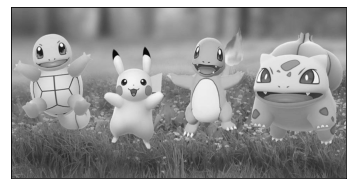

In [5]:
class Images():
    def __init__(self, image, title):
        self.image = image
        self.title = title

def plotImages(images,dim, size=(20, 15)):                                               
  fig, ax = plt.subplots(dim[0],dim[1],figsize=size)
  ax = ax.ravel()
  for i,image in enumerate(images):
    ax[i].imshow(image.image, cmap='gray',vmin = 0,vmax = 255)
    ax[i].set_title(image.title)
    ax[i].set_xlabel('Width [px]')
    ax[i].set_ylabel('Height [px]')
  plt.tight_layout()

  plt.show()

img = color.rgb2gray(io.imread('pokemon.jpg'))
img = img_as_ubyte(img)
print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()


# Part 1: Quantization
___

1. Insert your function quant_img(img, N) from the preliminary report.

In [6]:
# Insert your code:
def quant_img(img,N=256):
  f_max = img.max()
  f_min = img.min()
  dynamic = f_max - f_min
  q_img = np.floor((img/dynamic)*N)/N 
  return img_as_ubyte(q_img)

2. Load the image of your choise as gray scale image and perform uniform quantization on your image to **2, 4, 8, 16, 32 and 64** gray levels.   
    From which quantization factor do you observe the problem of **false contours**? Attach relevant examples from the quantized images to demonstrate your answer.

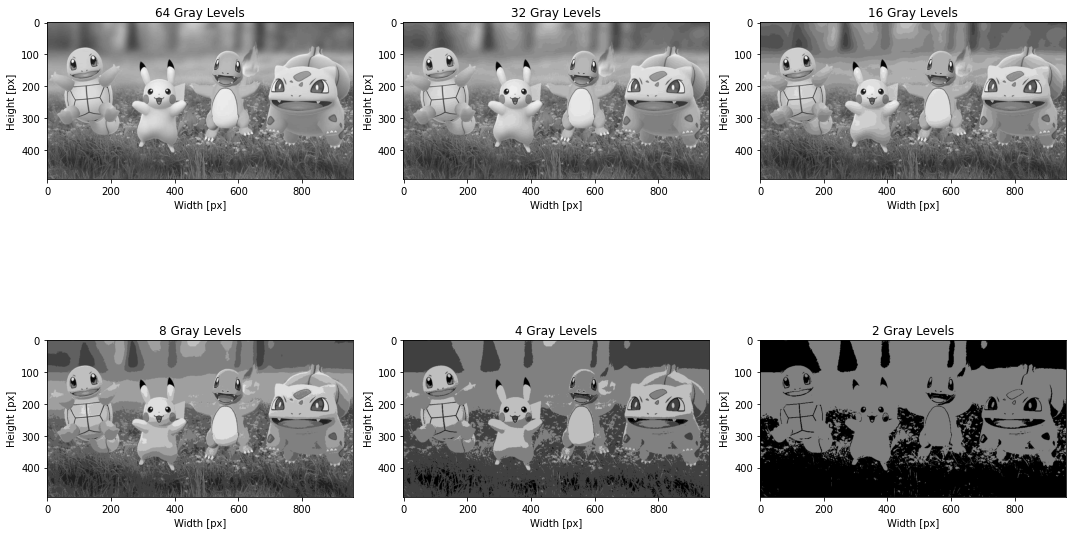

In [7]:
# Insert your code:
q_img = []
Q = [64,32,16,8,4,2]
for q in Q :
  q_img.append(Images(quant_img(img,q),str(q) + " Gray Levels" ))

plotImages(q_img, [2,3], (15, 10))


ניתן להבחין שכשאשר אנו מתחילים לייצג את התמונה ב16 רמות אפור ומטה כבר מתחילים  להופיע קווי מתאר שלא הופיעו בתמונה המקורית ושפות  שלא באמת קיימים בתמונה המקורית.אפשר להבחין בזה על ידי התבוננות ברקע שלאט לאט רואים שינויים יותר ויותר חדים היוצרים שפות שלא קיימות בניגוד לתמונה המקורית . בנוסף גם אם נסתכל בגופם של הפוקימונים , למשל בפיקאצ'ו נראה שבניגוד לתמונה המקורית הפעם אין לגוף שלא גוון אחיד. כאמור מבחינים בתופעה זו מ 16 רמות אפור אך ככל שיורדים במספר רמות האפור התופעה גדלה.  

3. Use the supplied function *imnoise()*, that adds Gaussian noise, on the image before quantization and test the effect on the false contours problem. Use zero mean noise with several values of variance.   
    You can use the quantization level that you chose in the previous section.
    
    What value of variance yields the optimal result? Attach examples of the quantized images with optimal and non-optimal variance values.

In [8]:
def imnoise(img, mean, std):
    noisy_img = img + np.random.normal(mean, std, img.shape)
    return np.clip(noisy_img, 0, 255)  # keep the bounds 

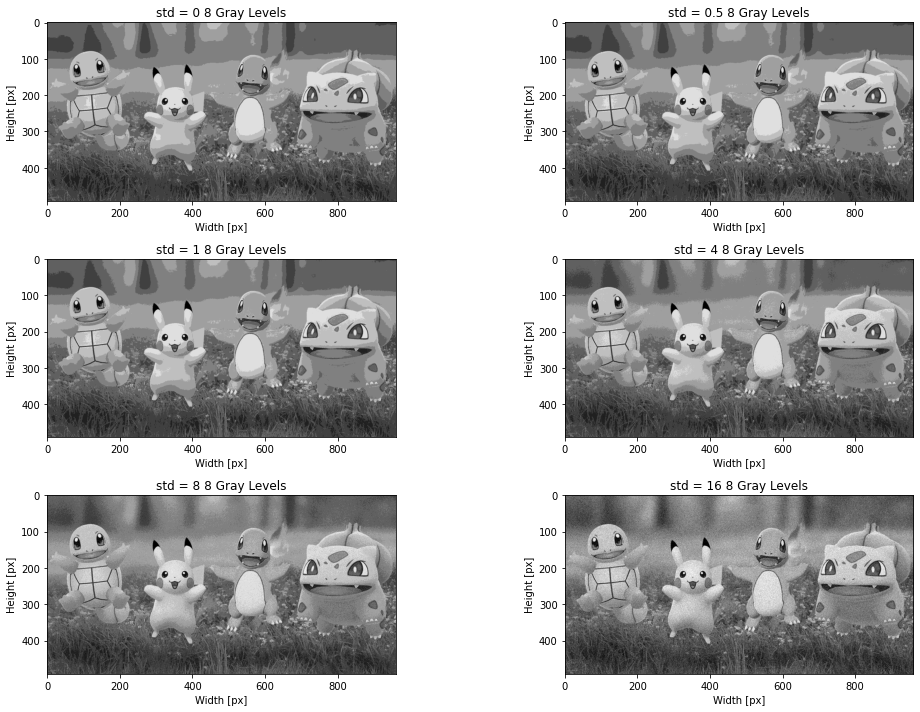

In [9]:
# Insert your code:
v_img = []
V = [0 ,0.5,1,4,8,16]
for v in V :
  v_img.append(Images(quant_img(imnoise(img, 0, v),8),"std = " + str(v) + " 8 Gray Levels" ))

plotImages(v_img,[3,2],(15, 10))

Write your answer here

נשים לב שהבעיה בסעיף קודם נוצרה מכך שנכאשר הורדנו את מספר רמות האפור בתמונה אז בעצם יצרנו קפיצה גדולה יותר בין פיקסלים שכנים  מה שהוביל לתופעה שדיברנו מקודם. כאשר נוסיף רעש אז הערך של הפיקסלים משתנה כתלות בגודל הרעש שנוסיף(כלומר בווריאנס) ולפני שנוריד את מספר רמות האפור ניצור מצב שכעת פיקסלים שכנים אינם בעלי ערכים קרובים כמו שהיו לפני - כאמור ככל שהרעש יותר גדול ככה הסיכוי ששני פיקסלים שכנים יהיו ברמת אפור רחוקה אחד מהשני יגדל - מה שלא קורה בתמונות אמיתיות כי לרוב אין שינוי כל כך מהותי בין פיקסל לפיקסל שכן. נבחין שפה קיבלנו שעבור רעש בעל ווריאנס 8 כבר לא מבחינים בתופעה אך זה במחיר דל תמונה רועשת . ככל שנגדיל עוד את הווריאנס התופעה תצטמצם אבל הרעש יגדל ולכן פה קיבלנו ש ווריאנס 8 זה המקרה האופטימלי לתמונה זו

4. perform quantization on your image using K-means to **2, 4, 8, 16, 32 and 64** gray levels. You may use the provided function. Plot the resulting histograms of both methods. What is the main difference?
    Compare your results to the results from the previous section.

In [10]:
def kmeans_quant_img(img,N):
    m,n = img.shape
    np.random.seed(0)
    image_array = img.reshape(-1,1)
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = cluster.KMeans(n_clusters= N).fit(image_array_sample)   
    labels = kmeans.predict(image_array)
    q_img = np.zeros_like(img)
    label_idx = 0
    for i in range(m):
        for j in range(n):
            q_img[i][j] = kmeans.cluster_centers_[labels[label_idx]]
            label_idx += 1

    return q_img

In [11]:
# Insert your code:
# Insert your code:
k_img = []
K = [64,32,16,8,4,2]
for k in K :
  k_img.append(Images(kmeans_quant_img(img,k),"K = " + str(k)   ))

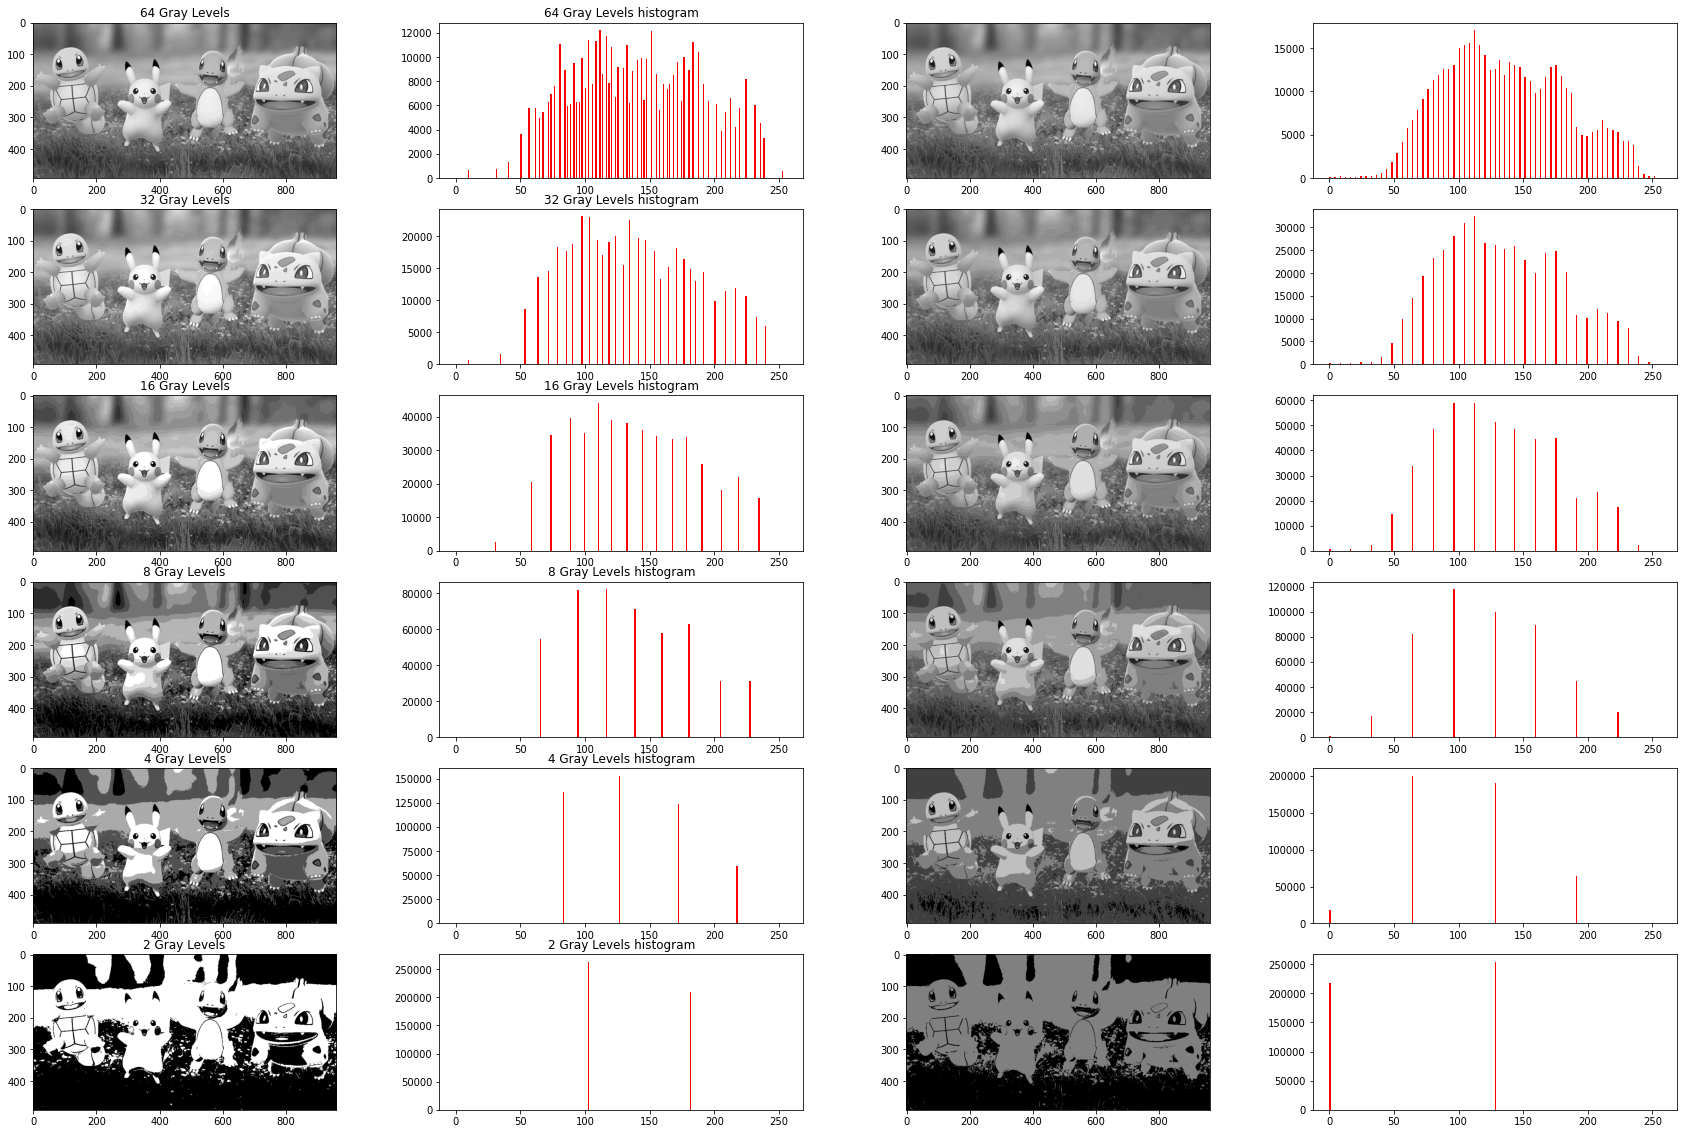

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(30, 20))
ax[0,0].imshow(k_img[0].image, cmap = 'gray'); ax[0,0].set_title(k_img[0].title)
ax[1,0].imshow(k_img[1].image, cmap = 'gray'); ax[1,0].set_title(k_img[1].title)
ax[2,0].imshow(k_img[2].image, cmap = 'gray'); ax[2,0].set_title(k_img[2].title)
ax[3,0].imshow(k_img[3].image, cmap = 'gray'); ax[3,0].set_title(k_img[3].title)
ax[4,0].imshow(k_img[4].image, cmap = 'gray'); ax[4,0].set_title(k_img[4].title)
ax[5,0].imshow(k_img[5].image, cmap = 'gray'); ax[5,0].set_title(k_img[5].title)

ax[0,1].hist(k_img[0].image.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title(k_img[0].title + ' histogram')
ax[1,1].hist(k_img[1].image.flatten(),256,[0,256], color = 'r'); ax[1,1].set_title(k_img[1].title + ' histogram')
ax[2,1].hist(k_img[2].image.flatten(),256,[0,256], color = 'r'); ax[2,1].set_title(k_img[2].title + ' histogram')
ax[3,1].hist(k_img[3].image.flatten(),256,[0,256], color = 'r'); ax[3,1].set_title(k_img[3].title + ' histogram')
ax[4,1].hist(k_img[4].image.flatten(),256,[0,256], color = 'r'); ax[4,1].set_title(k_img[4].title + ' histogram')
ax[5,1].hist(k_img[5].image.flatten(),256,[0,256], color = 'r'); ax[5,1].set_title(k_img[5].title + ' histogram')

ax[0,2].imshow(q_img[0].image, cmap = 'gray'); ax[0,0].set_title(q_img[0].title)
ax[1,2].imshow(q_img[1].image, cmap = 'gray'); ax[1,0].set_title(q_img[1].title)
ax[2,2].imshow(q_img[2].image, cmap = 'gray'); ax[2,0].set_title(q_img[2].title)
ax[3,2].imshow(q_img[3].image, cmap = 'gray'); ax[3,0].set_title(q_img[3].title)
ax[4,2].imshow(q_img[4].image, cmap = 'gray'); ax[4,0].set_title(q_img[4].title)
ax[5,2].imshow(q_img[5].image, cmap = 'gray'); ax[5,0].set_title(q_img[5].title)

ax[0,3].hist(q_img[0].image.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title(q_img[0].title + ' histogram')
ax[1,3].hist(q_img[1].image.flatten(),256,[0,256], color = 'r'); ax[1,1].set_title(q_img[1].title + ' histogram')
ax[2,3].hist(q_img[2].image.flatten(),256,[0,256], color = 'r'); ax[2,1].set_title(q_img[2].title + ' histogram')
ax[3,3].hist(q_img[3].image.flatten(),256,[0,256], color = 'r'); ax[3,1].set_title(q_img[3].title + ' histogram')
ax[4,3].hist(q_img[4].image.flatten(),256,[0,256], color = 'r'); ax[4,1].set_title(q_img[4].title + ' histogram')
ax[5,3].hist(q_img[5].image.flatten(),256,[0,256], color = 'r'); ax[5,1].set_title(q_img[5].title + ' histogram')
plt.show()



Write your answer here

נשים לב שקיים הבדל בין האולגוריתמים מבחינת באילו רמות אפור להשתמש - למשל באלגוריתם שלנו עבור 2 רמות אפור אנחנו משתמשים ברמת אפור 0 ו 128 לעומת זאת בשלהם זה בערך 100 ו 175 . ההבדל המהותי בין המימוש לשלנו למימוש של קיי מינס הוא שההיסטוגרמה שלהם יותר מאוזנת ולכן התמונה יותר חדה - כל לראות זאת על ידי הסתכלות בהיסטוגרמה ולהבחין ששלהם יותר אחידה . אנחנו נעשה ניסוי קטן ונפיעל את ההאלגוריתם שמשטח את ההיסטוגרמה ואז נשווה את התוצאות שלנו מול שלהם :




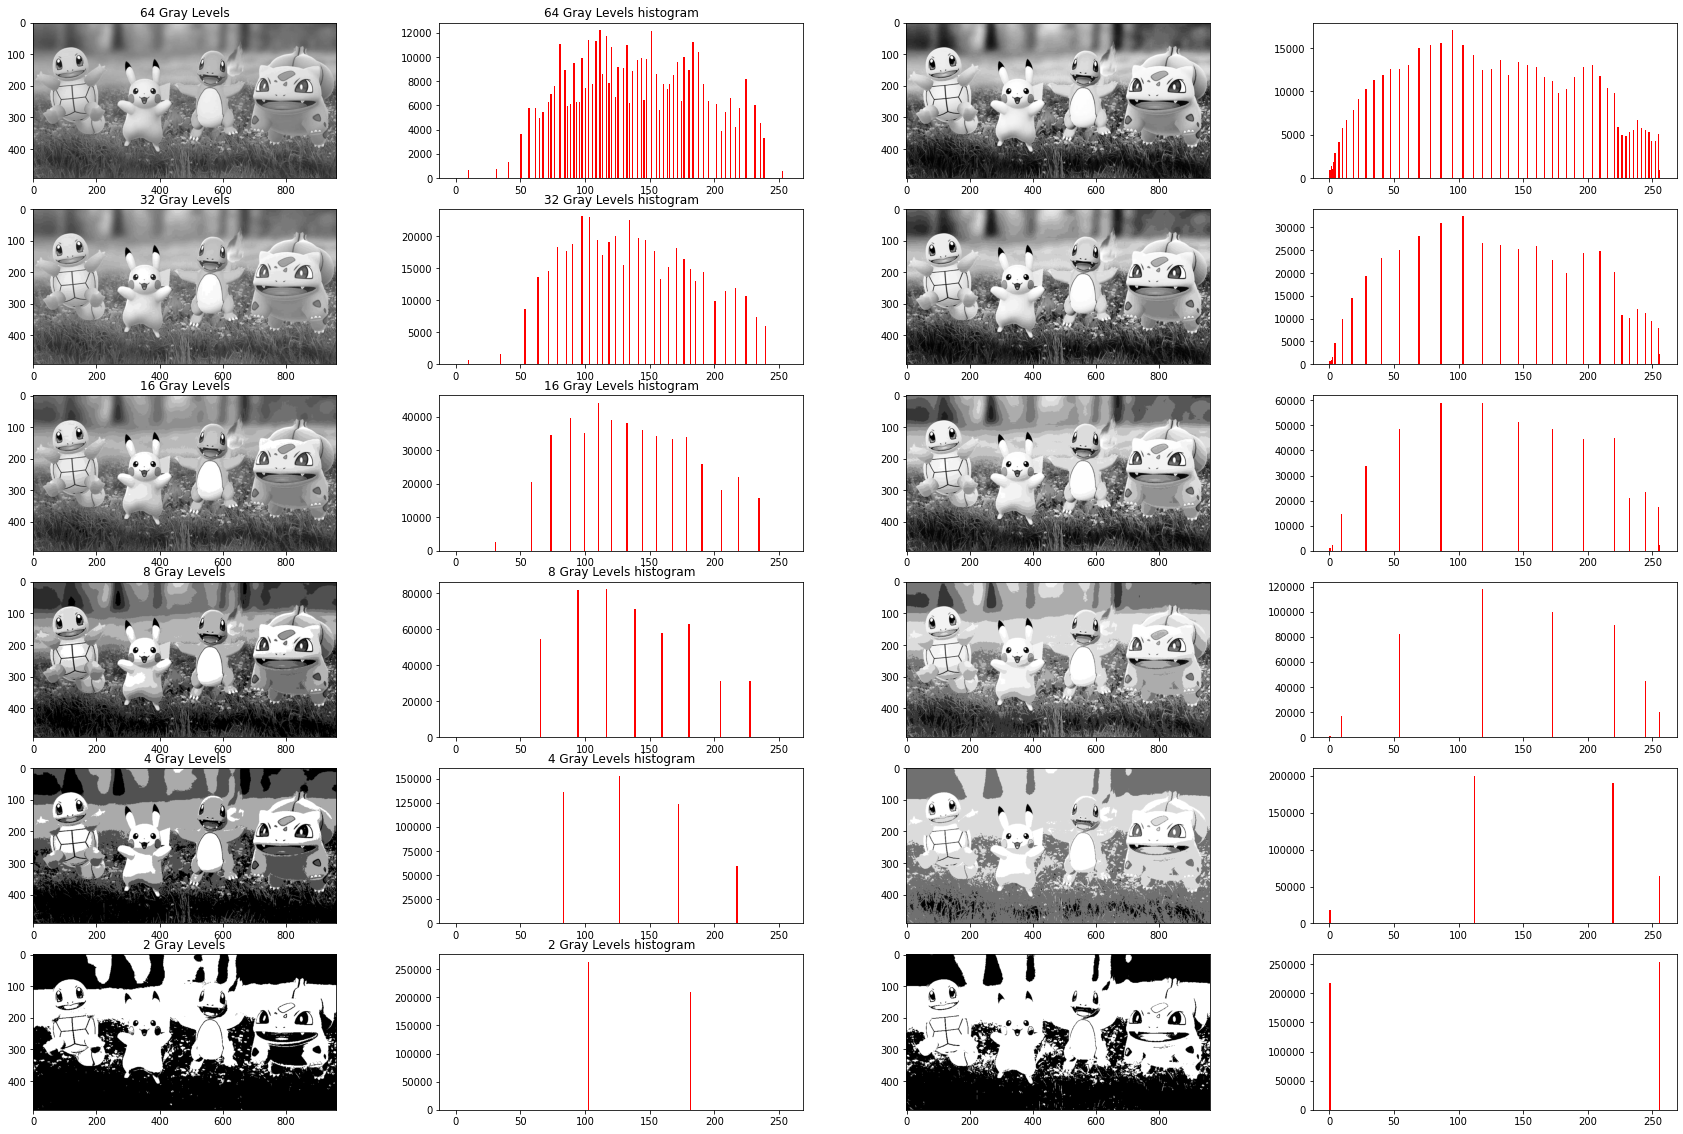

In [13]:
q_img_eq = []
for q in q_img:
  q_img_eq.append(Images(cv2.equalizeHist(q.image), q.title+ " equalized ") )

fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(30, 20))
ax[0,0].imshow(k_img[0].image, cmap = 'gray'); ax[0,0].set_title(k_img[0].title)
ax[1,0].imshow(k_img[1].image, cmap = 'gray'); ax[1,0].set_title(k_img[1].title)
ax[2,0].imshow(k_img[2].image, cmap = 'gray'); ax[2,0].set_title(k_img[2].title)
ax[3,0].imshow(k_img[3].image, cmap = 'gray'); ax[3,0].set_title(k_img[3].title)
ax[4,0].imshow(k_img[4].image, cmap = 'gray'); ax[4,0].set_title(k_img[4].title)
ax[5,0].imshow(k_img[5].image, cmap = 'gray'); ax[5,0].set_title(k_img[5].title)

ax[0,1].hist(k_img[0].image.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title(k_img[0].title + ' histogram')
ax[1,1].hist(k_img[1].image.flatten(),256,[0,256], color = 'r'); ax[1,1].set_title(k_img[1].title + ' histogram')
ax[2,1].hist(k_img[2].image.flatten(),256,[0,256], color = 'r'); ax[2,1].set_title(k_img[2].title + ' histogram')
ax[3,1].hist(k_img[3].image.flatten(),256,[0,256], color = 'r'); ax[3,1].set_title(k_img[3].title + ' histogram')
ax[4,1].hist(k_img[4].image.flatten(),256,[0,256], color = 'r'); ax[4,1].set_title(k_img[4].title + ' histogram')
ax[5,1].hist(k_img[5].image.flatten(),256,[0,256], color = 'r'); ax[5,1].set_title(k_img[5].title + ' histogram')

ax[0,2].imshow(q_img_eq[0].image, cmap = 'gray'); ax[0,0].set_title(q_img[0].title)
ax[1,2].imshow(q_img_eq[1].image, cmap = 'gray'); ax[1,0].set_title(q_img[1].title)
ax[2,2].imshow(q_img_eq[2].image, cmap = 'gray'); ax[2,0].set_title(q_img[2].title)
ax[3,2].imshow(q_img_eq[3].image, cmap = 'gray'); ax[3,0].set_title(q_img[3].title)
ax[4,2].imshow(q_img_eq[4].image, cmap = 'gray'); ax[4,0].set_title(q_img[4].title)
ax[5,2].imshow(q_img_eq[5].image, cmap = 'gray'); ax[5,0].set_title(q_img[5].title)

ax[0,3].hist(q_img_eq[0].image.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title(q_img[0].title + ' histogram')
ax[1,3].hist(q_img_eq[1].image.flatten(),256,[0,256], color = 'r'); ax[1,1].set_title(q_img[1].title + ' histogram')
ax[2,3].hist(q_img_eq[2].image.flatten(),256,[0,256], color = 'r'); ax[2,1].set_title(q_img[2].title + ' histogram')
ax[3,3].hist(q_img_eq[3].image.flatten(),256,[0,256], color = 'r'); ax[3,1].set_title(q_img[3].title + ' histogram')
ax[4,3].hist(q_img_eq[4].image.flatten(),256,[0,256], color = 'r'); ax[4,1].set_title(q_img[4].title + ' histogram')
ax[5,3].hist(q_img_eq[5].image.flatten(),256,[0,256], color = 'r'); ax[5,1].set_title(q_img[5].title + ' histogram')
plt.show()

לא קיבלנו תוצאות בדיוק כמו שלהם אך ניתן להבחין שהתוצאות הרבה יותר קרובות כעת אך עדיין קי מינס לדעתי נראה יותר טוב ככל שאנחנו משתמשים בפחות רמות אפור!

# Part 2: Histogram Manipulation
___

Use the supplied function hist_demo().  
* Observe the following demonstrations:
  * Contrast stretching.
  * Histogram equalization.

In [26]:
def my_hist(img):
  histogram = np.histogram(img, bins=list(range(0,257)))
  return histogram[0]
def my_hist_eq(img):
  cs = my_hist(img)
  for i in range(1,len(cs)):
   cs[i] += cs[i-1]

  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()

  # re-normalize the cumsum
  cs = nj / N

  # cast it back to uint8 since we can't use floating point values in images
  cs = cs.astype('uint8')
  flat = img.flatten()
  img_q = cs[flat]

  # put array back into original shape since we flattened it
  img_q = np.reshape(img_q, img.shape)
  return img_q


In [27]:
def hist_demo(img):
    # Contrast stretching
    img_dbl = np.float64(img)
    min_im = np.min(np.min(img_dbl))
    max_im = np.max(np.max(img_dbl))
    img_stretched_contrast = np.uint8(255*(img_dbl-min_im)/(max_im-min_im))
    
    # Histogram equalization
    #Use your own hist_eq function
    img_hist_eq = my_hist_eq(img) 
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Original image")
    # Use your own hist function
    hist = my_hist(img)
    ax[1].plot(hist)
    ax[1].set_title("Original image histogram")  
    plt.tight_layout(); plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(img_stretched_contrast, cmap='gray')
    ax[0].set_title("Contrast stretching image")
    # Use your own hist function
    hist = my_hist(img_stretched_contrast)
    ax[1].plot(hist)
    ax[1].set_title("Contrast stretching histogram")
    plt.tight_layout(); plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(img_hist_eq, cmap='gray')
    ax[0].set_title("Histogram equalization image")
    # Use your own hist function
    hist = my_hist(img_hist_eq)
    ax[1].plot(hist)
    ax[1].set_title("Histogram equalization histogram")
    plt.tight_layout(); plt.show()

Image shape:(533, 800), Image data type:uint8


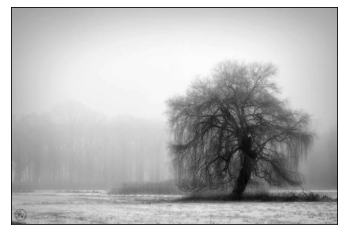

In [28]:
# Insert your code:
img = color.rgb2gray(io.imread('LowContrast.jpeg'))
img = img_as_ubyte(img)
print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

1. Load a **gray image** of your choise ans test these demonstrations. Make sure that the image you choose is indeed affected by both operations.   
    On which images contrast stretching won’t affect?  On which images histogram equalization won’t affect?\
    Use your own **hist** and **hist_eq** functions to complete the demo.\
    If your functions don't work properly use ***opencv*** to calculate the histogram and the histogram equalization.
    
    Note: 
    If you are experiencing any errors, try to convert the image to uint8 with image_as_ubyte (as we did in the first lab) before using the suplied function.

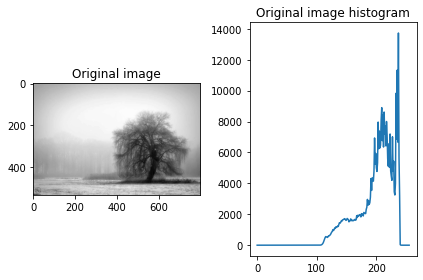

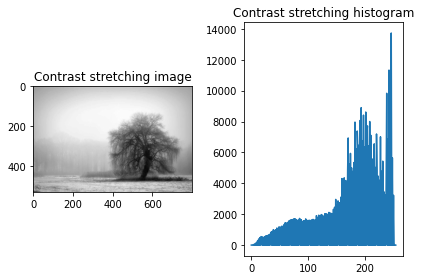

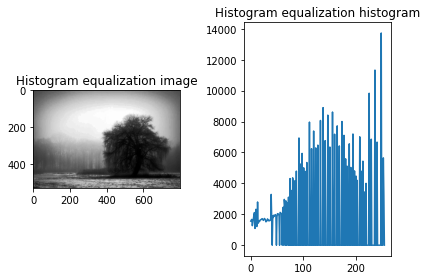

In [29]:
hist_demo(img)

Write your answer here

כאשר אנו מותחים את הניגודיות אנו בעצם מגדילים את טווח הערכים שיכסה את כל התחום הדינמי, כלומר מ 0 ל 255.
כאשר התחום הדינמי מכוסה(כלומר מספיק פיקסלבודד1 עם ערך 0 ופיקסל בודד עם ערך 255).לא יקרה כלום. קל לראות זאת על פי הנוסחה:

img_stretched_contrast = np.uint8(255*(img_dbl-min_im)/(max_im-min_im))

אם המינמום הוא 0 והמקסימום הוא 255 כאשר נציב נקבל:

img_stretched_contrast = np.uint8(255*(img_dbl-0)/(255)) =  np.uint8((img_dbl)

לשיטוח ההיסטוגרמה לא תהיה השפעה אם ההיסטוגרמה של התמונה המקורית כבר אחידה וזה טוב כי אנחנו לא נרצה להרוס .ניתן לראות זאת על פי הפונקציה שבנינו - כאשר ההיסטוגרמה אחידה אז פונקציית צפיפות ההסתברות אחידה וכתוצאה מכך פונקציית ההתפלגות שלנו תהיה מדרגות בקפיצה בעלת ערך קבוע ואז כל פיקסל בתמונת היעד יהיה שווה בדיוק לפיקסל בתמונה המקורית!






 תשובות נוספות לשאלות מהדוח

 1.

אם נרצה להפוך תמונה לבינרית כלומר ל 2 רמות אפור אז בהינתן היסטוגרמה המכילה בדיוק 2 רמות אפור אפשר לבצע התאמת היסטוגרמה כמו שאנו מבצעים בסעיף הבא - כאשר ניקח את התמונה ונתאים את ההיסטוגרמה שלה להיסטוגרמה המכילה 2 רמות אפור נקבל תמונה בינארית באופן תיאורטי (מעשי משהו יכול להשתבש שם כי שוב תמונות זה בדיד והתאוריה היא ברציף) , לחלופין אפשר להשתמש ב 2 הרמות מההיסטוגרמה כערכי סף ובאופן זה להפוך תמונה לבינארית.

2.

צריך להשלים





## Part 3: Histogram Specification

1. Complete the following code to create your own histogram specification function. Use only *numpy* functions, you may use *opencv* for histogram and histogram equalization calculations.\
The function will take two images: *src*, *ref*. *src* is the source image that undergoes the histogram specification. *ref* is the reference image with the taget histogram.
The algorithm should do the following:
*	Calculate the CDFs of both images: CDF_src, CDF_ref
*	Find for every CDF_src value the corresponding CDF_ref value
*	Apply the inverse of CDF_ref on the corresponding CDF_ref values

\
Helpful numpy functions: *np.unique*, *np.argmin*, *np.where*


Image shape:(492, 960), Image data type:uint8


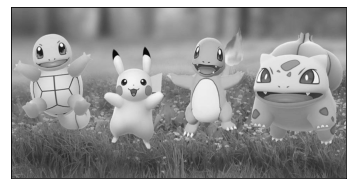

In [30]:
# Insert your code:

src = color.rgb2gray(io.imread('pokemon.jpg'))
src = img_as_ubyte(src)
print ('Image shape:{}, Image data type:{}'.format(src.shape,src.dtype))
plt.imshow(src, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

Image shape:(492, 960), Image data type:uint8


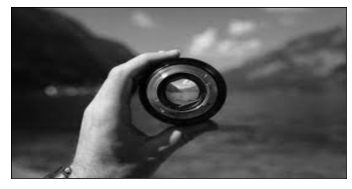

In [31]:
ref = color.rgb2gray(io.imread('circle.jpg'))
ref = resize(ref, src.shape,
                       anti_aliasing=True)
ref = img_as_ubyte(ref)
print ('Image shape:{}, Image data type:{}'.format(ref.shape,ref.dtype))
plt.imshow(ref, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

In [33]:
# Complete the following code skeleton:
def hist_spec(src, ref):
  """
  This is the skeleton for your image specification function.
  INPUT: src - an [H1 X W1] numpy array as float32 (a grayscale image with values between 0 to 1)
         ref - an [H2 X W2] numpy array as float32 (a grayscale image with values between 0 to 1)

  OUTPUT: im_out - an [H1 X W1] image as float32 (a grayscale image with values between 0 to 1)
  """
  
  oldshape = src.shape
  src = src.ravel()
  ref = ref.ravel()

  # get the set of unique pixel values and their corresponding indices and
  # counts
  s_values, bin_idx, s_counts = np.unique(src, return_inverse=True,
                                          return_counts=True)
  t_values, t_counts = np.unique(ref, return_counts=True)

  # take the cumsum of the counts and normalize by the number of pixels to
  # get the empirical cumulative distribution functions for the source and
  # template images (maps pixel value --> quantile)
  cdf_s = np.cumsum(s_counts).astype(np.float64)
  cdf_s /= cdf_s[-1]
  cdf_r = np.cumsum(t_counts).astype(np.float64)
  cdf_r /= cdf_r[-1]

  # interpolate linearly to find the pixel values in the template image
  # that correspond most closely to the quantiles in the source image
  im_out = np.interp(cdf_s,cdf_r, t_values)

  return im_out[bin_idx].reshape(oldshape)


  # ----------------------------------------------------
 


2. Test your function with two different images, show the source image and its histogram before and after transformation.

In [50]:
def plot_RGB(src,ref,matched1,matched2):

    plt.figure(figsize=(15,10))
    plt.subplot(422)
    plt.imshow(src,cmap='gray')
    plt.title("Source")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(424)
    plt.imshow(ref,cmap='gray')
    plt.title("REF")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(426)
    plt.imshow(matched1,cmap='gray')
    plt.title("Matched Image Our Algorithm")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(428)
    plt.imshow(matched2,cmap='gray')
    plt.title("Matched Image skimage Algorithm")
    plt.subplots_adjust(hspace=0.5)
    images = [src,ref,matched1,matched2]
    color = ('r','g','b','b')
    titles = ("src","ref" ,"match" , "skimage match")
    for i,col in enumerate(color):
        histr = cv2.calcHist([images[i]],[0],None,[256],[0,256])
        plt.subplot(i*2+421)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

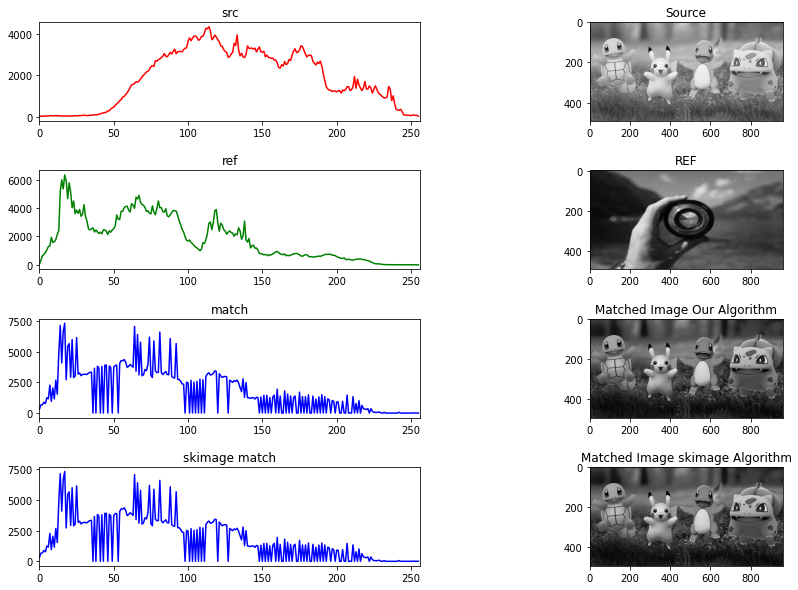

In [51]:
# Insert your code:
from skimage.exposure import match_histograms
matched1 = hist_spec(src,ref).astype('uint8')

matched2 = match_histograms(src, ref).astype('uint8')

plot_RGB(src,ref,matched1,matched2)

3. Read about the **match_histograms** function from *skimage*.\
What does the function do? Take 2 different grayscale images and apply on them the **match_histograms** function. Show the output image and compare its histogram to the reference image's histogram. Is the result different from your implementation? Why?

Write your answer here

נשים לב שמבחינת תוצאות המימוש שלנו והמימוש של הפונקציה המובנת הניב בדיוק את אותו הדבר. הפונקציה כאמור עושה את מה שמימשנו וזה להתאים את ההיסטוגרמה של תמונה כלשהי לתמונה אחרת. קיבלנו היסטוגרמה רועשת וזה מפני שאנו עובדים עם תמונות שאלו ערכים בדידים (בין 0 ל 255). נשים לב שההיסטוגרמה שקיבלנו דומה להיסטודרמה של תמונת הרפרנס.

צריך להשלים

4. Calculate the distance between the refernce histogram and the source histogram, and the distance between the refernce histogram and the output histogram. How is the distance affected by histogram specification?
Do this comparison for **your function** and for skimage **match_histograms** as well.

Use ***scipy.stats.wasserstein_distance*** to calculate the distances between histograms.

In [63]:
# Insert your code:
from scipy.stats import wasserstein_distance
src_hist = my_hist(src)
ref_hist = my_hist(ref)
matched1_hist = my_hist(matched1)
matched2_hist = my_hist(matched2)
print("the distance between the src image to the ref image :" + str(wasserstein_distance(src_hist.flatten(),ref_hist.flatten())))
print("the distance between the our matched image to the ref image :" + str(wasserstein_distance(matched1_hist.flatten(),ref_hist.flatten())))
print("the distance between the skiimage matche image to the ref image :" + str(wasserstein_distance(matched2_hist.flatten(),ref_hist.flatten())))

the distance between the src image to the ref image :369.734375
the distance between the our matched image to the ref image :310.7109375
the distance between the skiimage matche image to the ref image :310.7109375


Write your answer here

כמובן שהמרחק ירד - נשים לב שהמימוש שלנו ושל האלגוריתם המובנה הניב אותן תוצאות אז כל הכבוד לנו!

# Part 3: Camshift Algorithm


1. We now test the Camshift algorithm for video tracking, as explained in the Lab Manual. Given is a demo script, which loads a short video file 'MOT16-04-trimmed.mp4' from the MOT16 dataset and writes a new video file 'output.mp4' displaying the tracked object. Modify the initial ROI coordinates so that the algorithm tracks an object to your liking and observe the results.

2. Attach several captured frames of the tracked object to your report and answer the following: 
* What color space is used here for tracking and why? 
* What is the main disadvantage of the given algorithm?

Write your answer here

בדוח מכין ראינו שהאלוגריתם לוקח את הפריים הראשון בוידאו יחד עם רוי שהגדרנו לא ומבצע היסטוגרמה לפי ערוץ הצבע על אותו תחום. לאחר מכן הוא רץ על חלון באותו גודל כפי שהגדרנו בהתחלה ומבצע חישוב פיקסל פיקסל מה ההסתברות שהוא שייך לאובייקט שלנו לפי ההיסטוגרמה אשר בצענו בהתחלה על ערוץ הצבע מפה כמובן הייצוג יהיה:
HSV
החסרון הבוהק לעין של האלגוריתם הוא שהוא לא יוכל זהות את האובייקט אם לרקע יש אותו צבע כמו שלו , או לחלופין אם בין פריים לפריים יש אובייקט נוסף עם אותו צבע כמו שלו. בנוסף כאמור כל האלגוריתם מובנה על ערוץ הצבע ולעיתים הצבע חסר משמעות - למשל אם   זיהוי מכוניות כמו שמכונית אוטונומית עובדת - היא מזהה מכוניות בתמונה ללא תלות בצבע שלהן!
כמו כן כאשר אם יש אובייקט נוסף עם אותו הצבע תיווצר שגיאה!

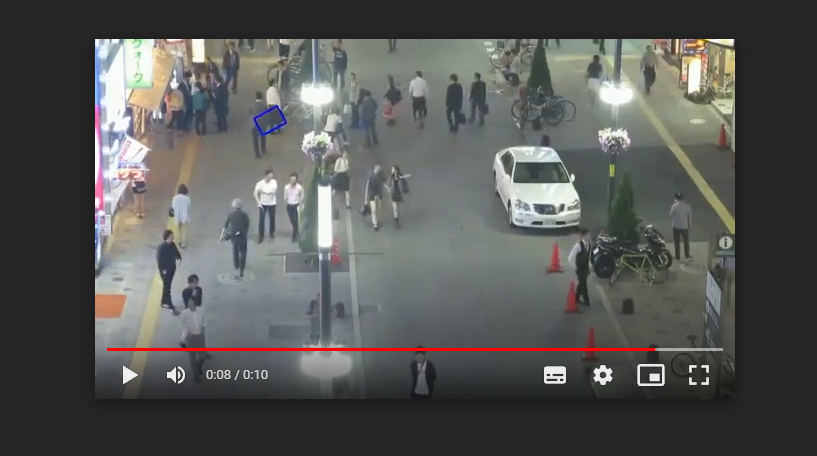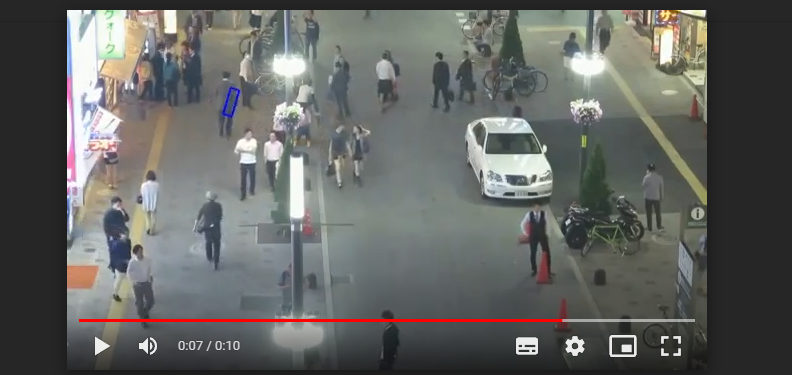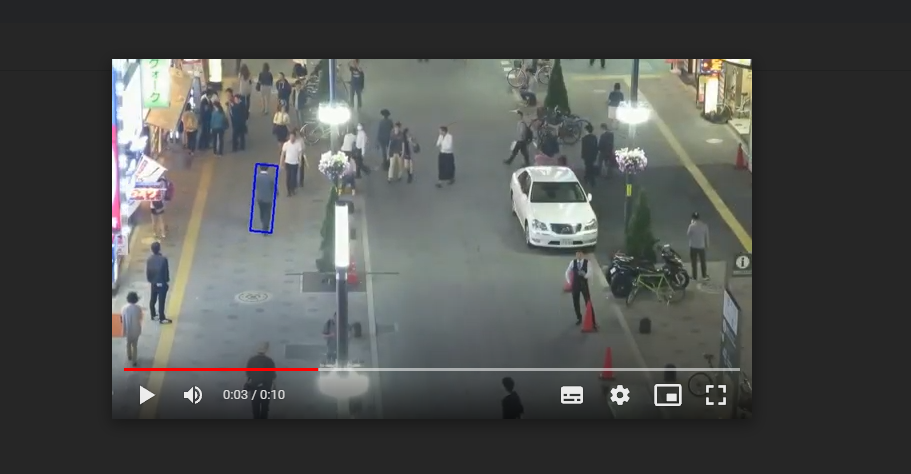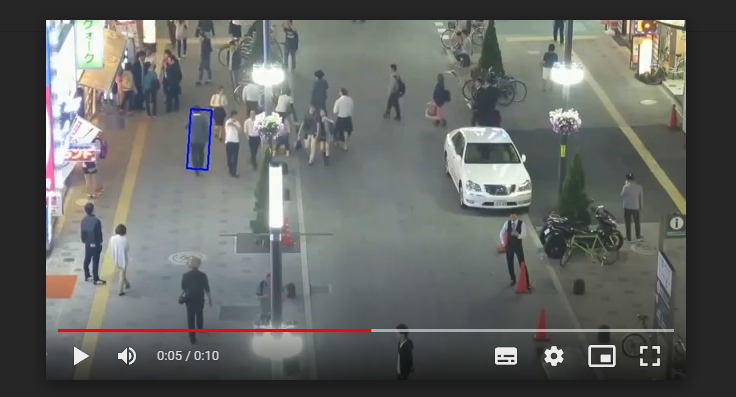

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('MOT16-04-trimmed.mp4')

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width,frame_height))

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
#### INSERT THE ROI VALUES HERE ###
x,h,y,w = 190, 110, 210, 30
track_window = (x,y,w,h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]

# convert ROI to HSV
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# create ROI normalized histogram
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        # convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # get probabilty map
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        # draw window on frame
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        k = cv2.waitKey(60) & 0xff
        
        if k == 27:
            break
        else:
            # Write the frame into the file 'output.avi'
            out.write(img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()
out.release()